In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
import numpy as np
import numpy
from sklearn.metrics import roc_curve, auc

In [2]:
img_height, img_width = 500, 500
batch_size = 20

data_dir = pathlib.Path("C:/Users/User/Desktop/FYP/New Classification/Diseases")
class_names = ["Apple_scab", "Black_rot", "Cedar_apple_rust", "Healthy"]

label_encoder = LabelEncoder()
label_encoder.fit(class_names)

train_ds= tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    labels="inferred",
    label_mode="int",
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    labels="inferred",
    label_mode="int",
    seed=42
)

test_dir = pathlib.Path("C:/Users/User/Desktop/FYP/New Classification/Test")
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 7771 files belonging to 4 classes.
Found 7771 files belonging to 4 classes.
Found 1943 files belonging to 4 classes.


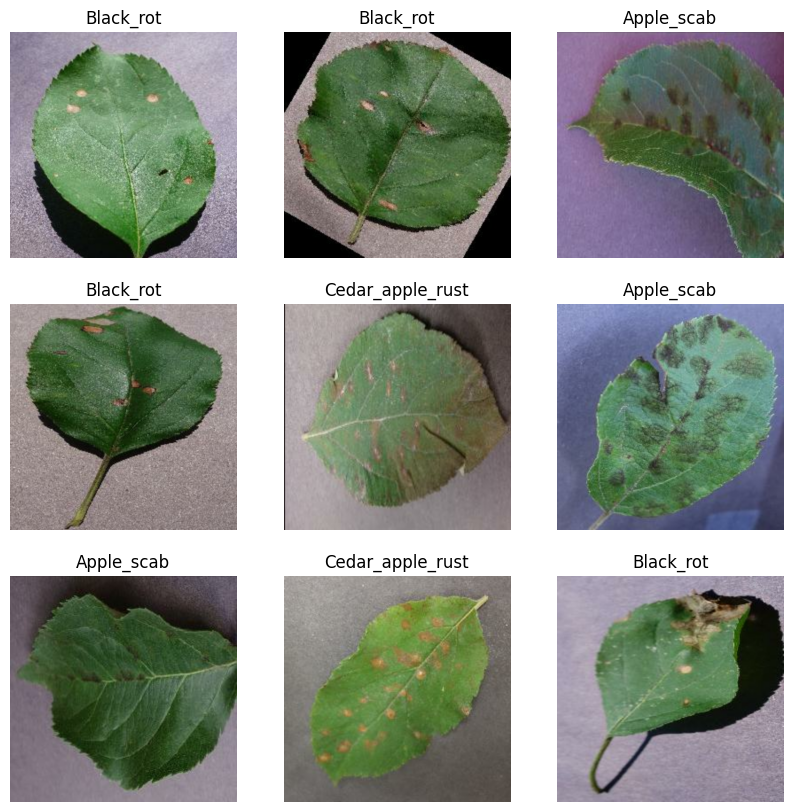

In [3]:
class_names = ["Apple_scab", "Black_rot", "Cedar_apple_rust","Healthy"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
num_classes = len(class_names)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes)
])

In [6]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.Conv2D(32, 3, activation="relu"),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, 3, activation="relu"),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(128, 3, activation="relu"),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation="relu"),
#     tf.keras.layers.Dense(128, activation="relu"),
#     tf.keras.layers.Dense(num_classes)
# ]
# )

In [7]:
# model = tf.keras.Sequential(
#     [
#      tf.keras.layers.Rescaling(1./255),
#      tf.keras.layers.Conv2D(32, 3, activation="relu"),
#      tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Conv2D(32, 3, activation="relu"),
#      tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Conv2D(32, 3, activation="relu"),
#      tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Flatten(),
#      tf.keras.layers.Dense(128, activation="relu"),
#      tf.keras.layers.Dense(num_classes)
#     ]
# )

In [8]:
# Define the momentum value
momentum_value = 0.99

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3, beta_1=momentum_value),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [10]:
epochs = 30
history=model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/30
389/389 [==============================] - 1619s 4s/step - loss: 1.0842 - accuracy: 0.5288 - val_loss: 0.7337 - val_accuracy: 0.6739
Epoch 2/30
389/389 [==============================] - 1948s 5s/step - loss: 0.5880 - accuracy: 0.7787 - val_loss: 0.4485 - val_accuracy: 0.8285
Epoch 3/30
389/389 [==============================] - 1320s 3s/step - loss: 0.4531 - accuracy: 0.8343 - val_loss: 0.2974 - val_accuracy: 0.8829
Epoch 4/30
389/389 [==============================] - 1341s 3s/step - loss: 0.3600 - accuracy: 0.8642 - val_loss: 0.2301 - val_accuracy: 0.9089
Epoch 5/30
389/389 [==============================] - 1294s 3s/step - loss: 0.3430 - accuracy: 0.8711 - val_loss: 0.1914 - val_accuracy: 0.9265
Epoch 6/30
389/389 [==============================] - 1294s 3s/step - loss: 0.3058 - accuracy: 0.8882 - val_loss: 0.1824 - val_accuracy: 0.9317
Epoch 7/30
389/389 [==============================] - 1301s 3s/step - loss: 0.2322 - accuracy: 0.9183 - val_loss: 0.1152 - val_accuracy:

In [11]:
model.evaluate(test_ds)

98/98 [==============================] - 45s 453ms/step - loss: 0.3400 - accuracy: 0.9259


[0.3400260806083679, 0.9258878231048584]

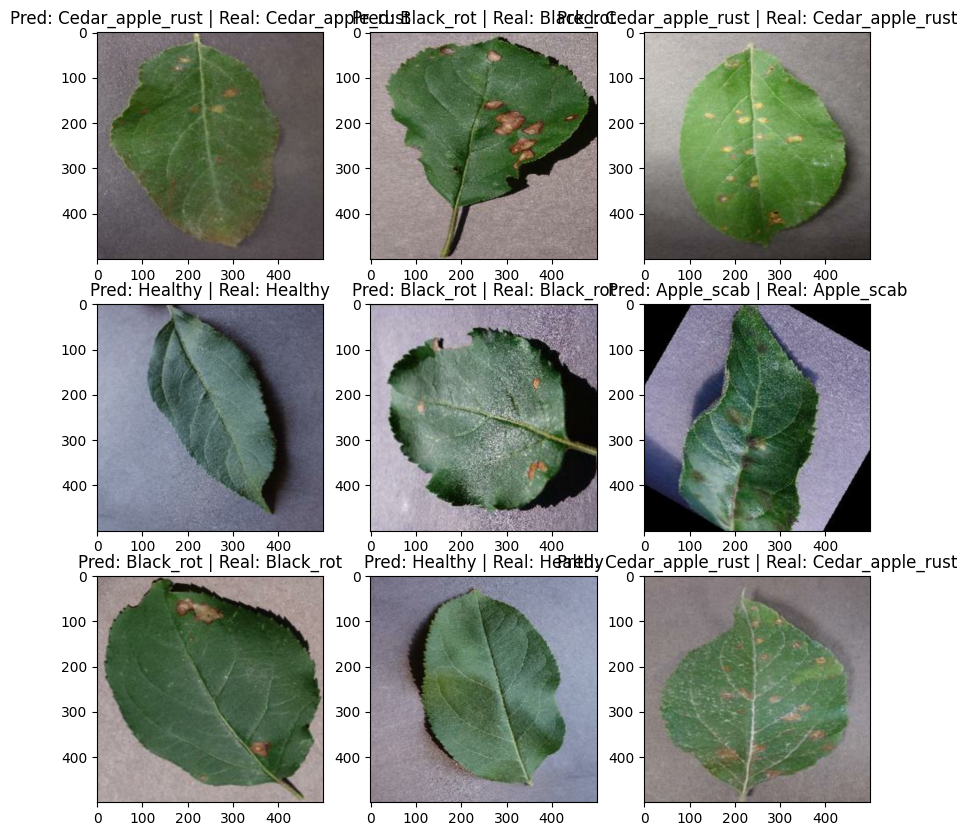

In [18]:

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

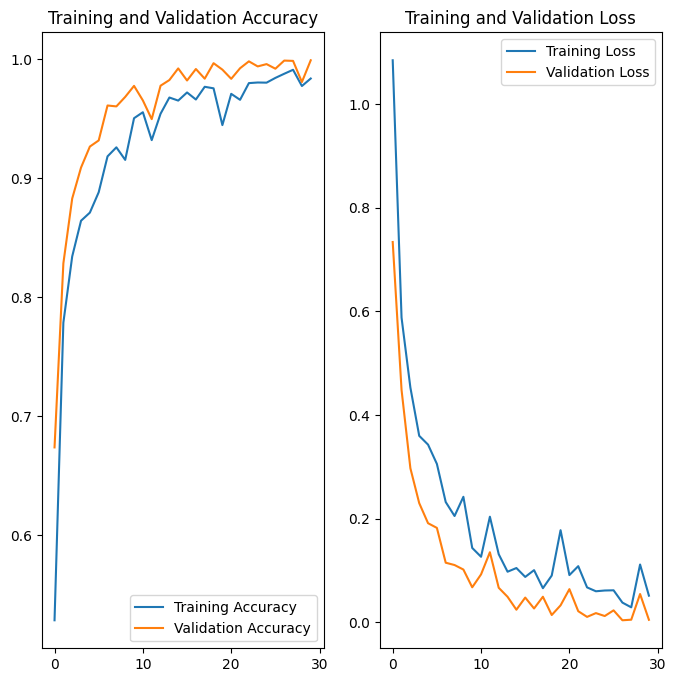

In [19]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# # Plot the training and validation accuracy
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

1/1 [==============================] - 0s 98ms/step


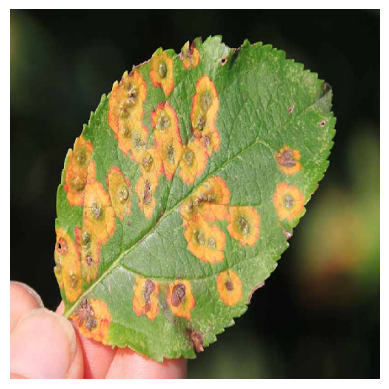

None This image most likely belongs to Cedar_apple_rust with a 100.00 percent confidence.


In [38]:
# Load and predict on a test image
test_image_path = "C:/Users/User/Desktop/FYP/archive/testing/r.jpg"
img = image.load_img(
    test_image_path, target_size=(img_height, img_width)
)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

plt.imshow(img)
plt.axis('off')
plt.show()

print(
    plt.show(img),
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [30]:
model.save("C:/Users/User/Desktop/FYP/New Classification/Saved Model/lr-3 m0.99 layers2")

INFO:tensorflow:Assets written to: C:/Users/User/Desktop/FYP/New Classification/Saved Model/lr-3 m0.99 layers2\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/FYP/New Classification/Saved Model/lr-3 m0.99 layers2\assets


In [31]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


# Save the TFLite model to disk
with open('C:/Users/User/Desktop/FYP/New Classification/save tfl/model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp9fsp3xnm\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp9fsp3xnm\assets
